In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1


In [4]:
df.shape

(116058, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [6]:
df.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,116058.0,5.494155e+11,2.597560e+11,1.000009e+11,3.244656e+11,5.486239e+11,7.743034e+11,9.999971e+11
interest_rate,116058.0,3.868961e+00,4.610200e-01,2.250000e+00,3.500000e+00,3.875000e+00,4.125000e+00,6.750000e+00
unpaid_principal_bal,116058.0,2.082262e+05,1.146851e+05,1.100000e+04,1.200000e+05,1.830000e+05,2.780000e+05,1.200000e+06
loan_term,116058.0,2.922810e+02,8.976241e+01,6.000000e+01,1.800000e+02,3.600000e+02,3.600000e+02,3.600000e+02
loan_to_value,116058.0,6.743194e+01,1.729172e+01,6.000000e+00,5.700000e+01,7.200000e+01,8.000000e+01,9.700000e+01
number_of_borrowers,116058.0,1.593186e+00,4.912417e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
debt_to_income_ratio,116058.0,3.074229e+01,9.730798e+00,1.000000e+00,2.300000e+01,3.100000e+01,3.900000e+01,6.400000e+01
borrower_credit_score,116058.0,7.699268e+02,4.221071e+01,0.000000e+00,7.510000e+02,7.820000e+02,8.000000e+02,8.400000e+02
insurance_percent,116058.0,2.786288e+00,8.096464e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
co-borrower_credit_score,116058.0,4.596116e+02,3.819469e+02,0.000000e+00,0.000000e+00,7.400000e+02,7.910000e+02,8.360000e+02


In [8]:
df.corr()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
loan_id,1.000000,-0.000902,0.005385,-0.001277,0.000761,0.001739,0.003894,0.001230,0.000948,0.001919,...,-0.007563,-0.005626,-0.005968,-0.006668,-0.002793,-0.003849,-0.002362,-0.004116,-0.003572,-0.002982
interest_rate,-0.000902,1.000000,-0.002854,0.720734,0.273379,-0.128075,0.181988,-0.210468,0.143116,-0.138013,...,0.030543,0.035726,0.034311,0.032133,0.035393,0.035841,0.037994,0.037051,0.039708,0.054298
unpaid_principal_bal,0.005385,-0.002854,1.000000,0.192168,0.062447,0.130565,0.073415,0.052061,0.010926,0.132632,...,-0.010344,-0.011461,-0.007814,-0.008912,-0.009228,-0.008983,-0.005866,-0.006412,-0.008254,-0.017120
loan_term,-0.001277,0.720734,0.192168,1.000000,0.292565,-0.107341,0.137852,-0.072021,0.190762,-0.110268,...,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015773,0.023502
loan_to_value,0.000761,0.273379,0.062447,0.292565,1.000000,-0.100898,0.126993,-0.142574,0.490128,-0.109546,...,0.009826,0.006928,0.010560,0.010243,0.009938,0.008775,0.011103,0.010856,0.010811,0.016357
number_of_borrowers,0.001739,-0.128075,0.130565,-0.107341,-0.100898,1.000000,-0.134395,0.120120,-0.058976,0.996498,...,-0.023442,-0.024665,-0.022337,-0.023716,-0.027472,-0.028033,-0.025946,-0.027608,-0.029661,-0.039979
debt_to_income_ratio,0.003894,0.181988,0.073415,0.137852,0.126993,-0.134395,1.000000,-0.184406,0.066946,-0.145145,...,0.015444,0.020784,0.021242,0.021904,0.025402,0.022836,0.024310,0.025467,0.024697,0.038033
borrower_credit_score,0.001230,-0.210468,0.052061,-0.072021,-0.142574,0.120120,-0.184406,1.000000,-0.062849,0.153952,...,-0.057269,-0.066448,-0.063116,-0.064656,-0.063057,-0.062565,-0.062256,-0.061407,-0.063148,-0.094215
insurance_percent,0.000948,0.143116,0.010926,0.190762,0.490128,-0.058976,0.066946,-0.062849,1.000000,-0.063370,...,-0.000735,-0.003598,-0.001315,-0.003097,-0.001997,-0.002225,-0.000652,-0.000102,0.000598,0.005722
co-borrower_credit_score,0.001919,-0.138013,0.132632,-0.110268,-0.109546,0.996498,-0.145145,0.153952,-0.063370,1.000000,...,-0.024716,-0.026393,-0.024080,-0.025423,-0.028770,-0.029218,-0.027354,-0.028930,-0.030878,-0.042651


In [9]:
df.isnull().sum().sum()

0

There is no missing value in train data. 


In [10]:
numerical_features = df.select_dtypes(include=np.number)
categorical_features = df.select_dtypes(include=np.object)
print("numerical_features:", numerical_features.shape, numerical_features.columns)
print("categorical_features:", categorical_features.shape, categorical_features.columns)

numerical_features: (116058, 24) Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')
categorical_features: (116058, 5) Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose'],
      dtype='object')


In [11]:
# skewness & kurtosis
pd.DataFrame({"Skewness": df.skew(), "Kurtosis": df.kurt()})

,Skewness,Kurtosis
loan_id,0.004114,-1.197545
interest_rate,0.051326,0.169871
unpaid_principal_bal,0.897524,0.556988
loan_term,-0.692948,-1.293404
loan_to_value,-0.765251,0.078106
number_of_borrowers,-0.379397,-1.856090
debt_to_income_ratio,-0.194303,-0.825119
borrower_credit_score,-3.570945,48.502768
insurance_percent,2.743691,5.871008
co-borrower_credit_score,-0.362473,-1.849904


If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric


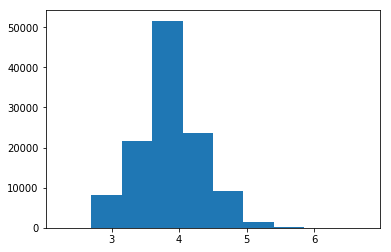

In [12]:
plt.hist(df.interest_rate)
plt.show()

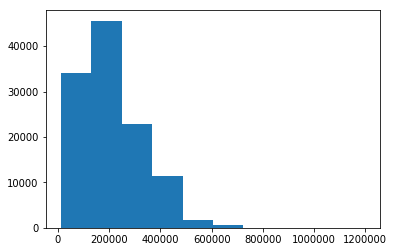

In [13]:
plt.hist(df.unpaid_principal_bal)
plt.show()

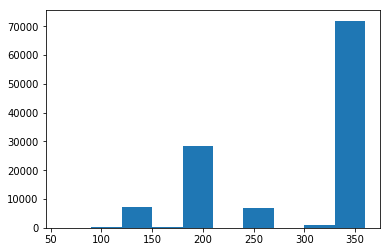

In [14]:
plt.hist(df.loan_term)
plt.show()

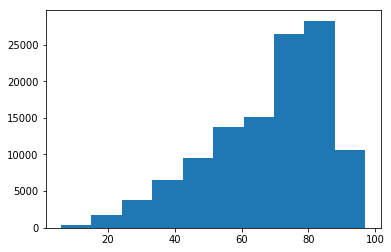

In [15]:
plt.hist(df.loan_to_value)
plt.show()

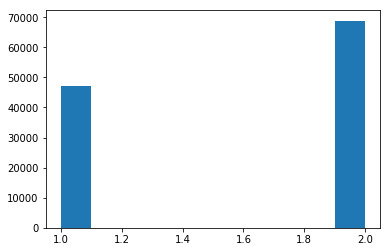

In [16]:
plt.hist(df.number_of_borrowers)
plt.show()

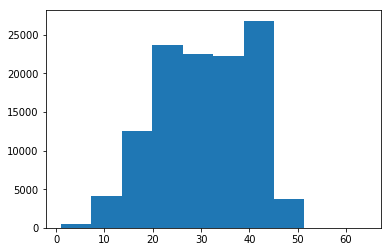

In [17]:
plt.hist(df.debt_to_income_ratio)
plt.show()

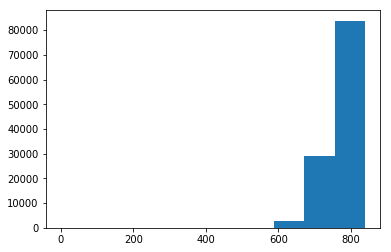

In [18]:
plt.hist(df.borrower_credit_score)
plt.show()

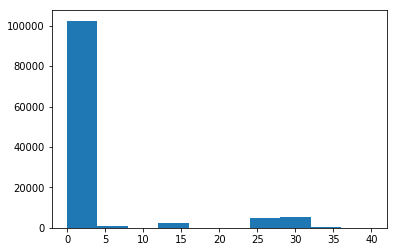

In [19]:
plt.hist(df.insurance_percent)
plt.show()

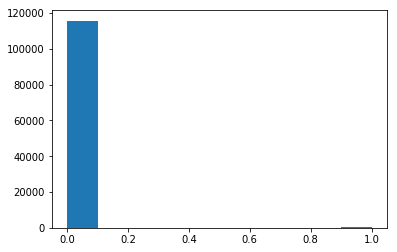

In [20]:
plt.hist(df.insurance_type)
plt.show()

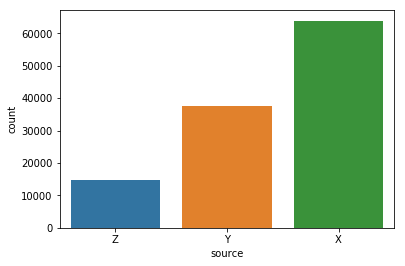

In [21]:
sns.countplot(x='source',data=df)

In [22]:
df['source'].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [23]:
df['financial_institution'].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

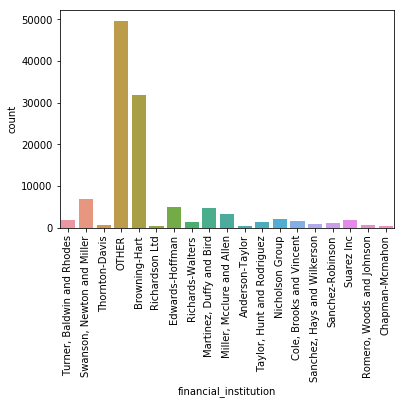

In [24]:
sns.countplot(x="financial_institution", data=df)
plt.xticks(rotation =90)

In [25]:
df['loan_purpose'].value_counts()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

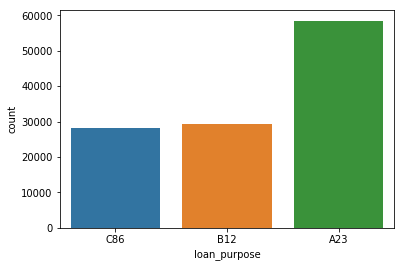

In [26]:
sns.countplot(x='loan_purpose',data=df)

In [27]:
df['insurance_type'].value_counts()

0.0    115680
1.0       378
Name: insurance_type, dtype: int64

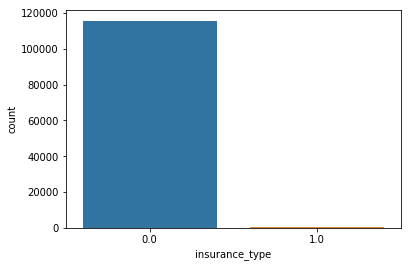

In [28]:
sns.countplot(x='insurance_type',data=df)

In [29]:
df.m13.value_counts()

0    115422
1       636
Name: m13, dtype: int64

### Data is highly imbalance

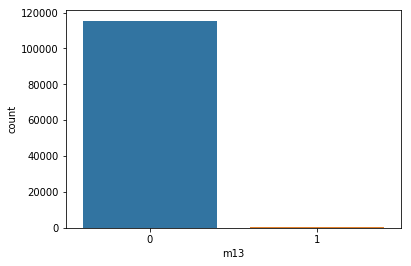

In [30]:
sns.countplot(x='m13',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

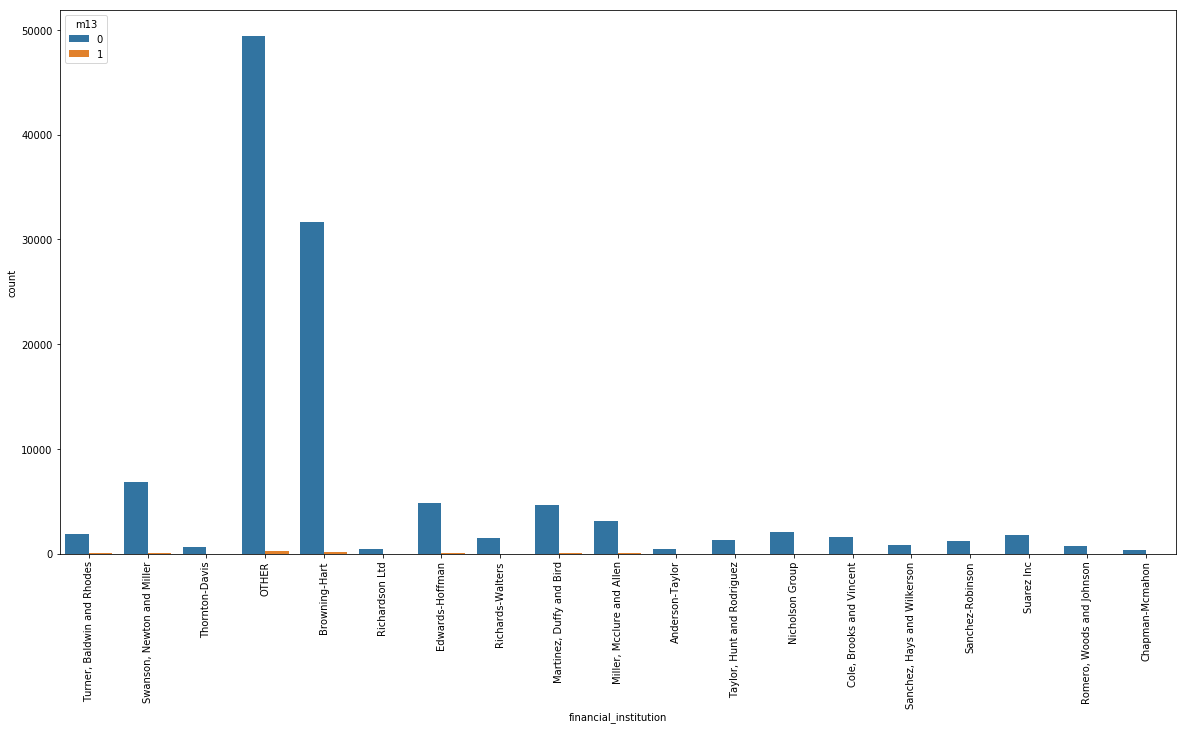

In [31]:
plt.figure(figsize=(20, 10))
sns.countplot(x="financial_institution", hue="m13", data=df)
plt.xticks(rotation =90)

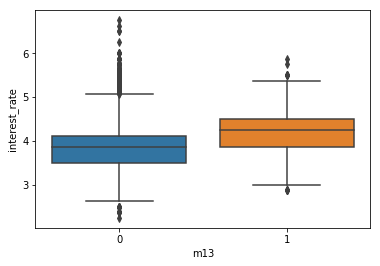

In [32]:
sns.boxplot(x='m13', y='interest_rate', data=df)
plt.show()

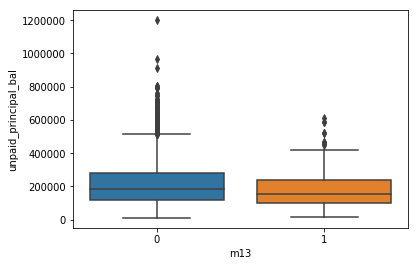

In [33]:
sns.boxplot(x='m13', y='unpaid_principal_bal', data=df)
plt.show()

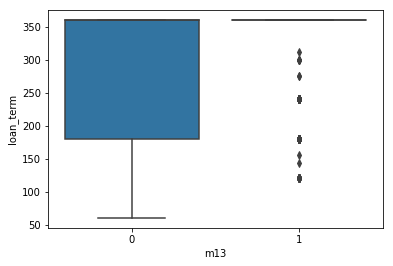

In [34]:
sns.boxplot(x='m13', y='loan_term', data=df)
plt.show()

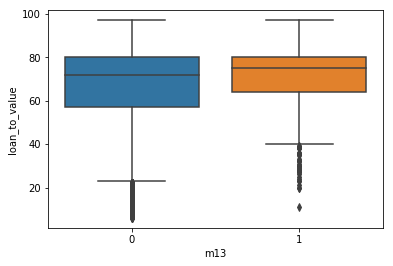

In [35]:
sns.boxplot(x='m13', y='loan_to_value', data=df)
plt.show()

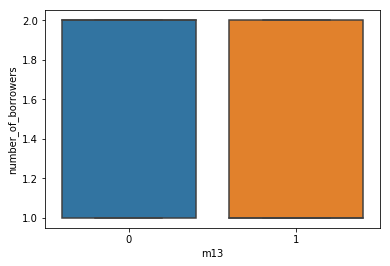

In [36]:
sns.boxplot(x='m13', y='number_of_borrowers', data=df)
plt.show()

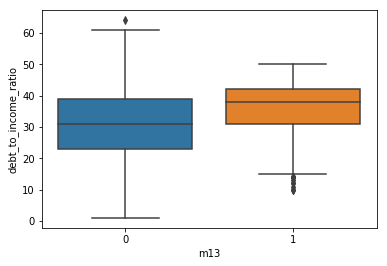

In [37]:
sns.boxplot(x='m13', y='debt_to_income_ratio', data=df)
plt.show()

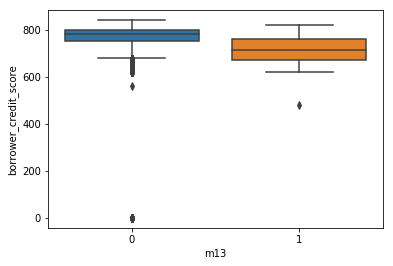

In [38]:
sns.boxplot(x='m13', y='borrower_credit_score', data=df)
plt.show()

more credit score means they are able to repay their loan EMI.

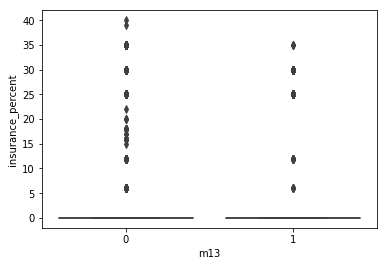

In [39]:
sns.boxplot(x='m13', y='insurance_percent', data=df)
plt.show()

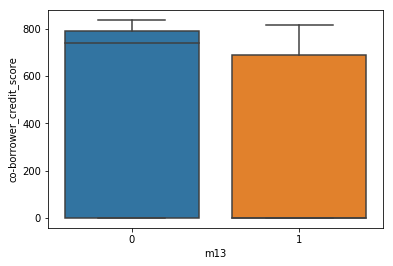

In [40]:
sns.boxplot(x='m13', y='co-borrower_credit_score', data=df)
plt.show()

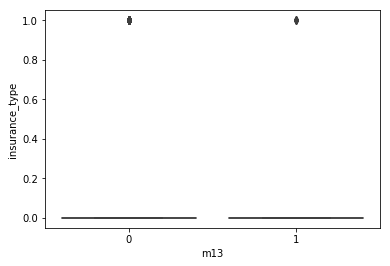

In [41]:
sns.boxplot(x='m13', y='insurance_type', data=df)
plt.show()

There are 29 features and 116058 rows with 3 categorical and 2 boolean and2 datetime columns

The max loan term is only 1 year and data given is only for 3 months

and origination_date and first_payment date has distance of 1 to 3 months

There is NA values in dataset

No duplicated in loan_id values

Looks like m11,12 are very important in Month-wise loan performance column as the values are incremented when there is a delay in payment.

The count of X source is the highest among X,Y,Z

Others followed by Browning Hart has the highest no of loans disbursed.

Minimum loan term is 60 days and the maximum term is 360 days.

Minimum intrest is 2.25 and maximum rate is 6.75

The default rate of loans with a single borrower is 3 times more than two borrowers

The debt-to-income (DTI) ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments.A low DTI ratio demonstrates a good balance between debt and income. The debt to income ratio of Deliquent loan is from 10 to 50 whereas for non delinquent it is from 0 to 64.

The highest no of loans are given for A23 category

Majority of the loan have no insurance

If 'borrower_credit_score is low, delinquency chances are high

If 'debt_to_income_ratio' is high, delinquency chances are high

If 'interest_rate' is high, delinquency chances are high

Other variables are not showing any significant relationship with m13 delinquency


In [42]:
df.groupby('financial_institution')['m13'].value_counts()

financial_institution        m13
Anderson-Taylor              0        480
                             1          3
Browning-Hart                0      31677
                             1        175
Chapman-Mcmahon              0        388
Cole, Brooks and Vincent     0       1630
                             1         12
Edwards-Hoffman              0       4816
                             1         41
Martinez, Duffy and Bird     0       4692
                             1         23
Miller, Mcclure and Allen    0       3139
                             1         19
Nicholson Group              0       2105
                             1         11
OTHER                        0      49430
                             1        269
Richards-Walters             0       1454
                             1          5
Richardson Ltd               0        472
                             1          1
Romero, Woods and Johnson    0        748
                             1          2
S

In [43]:
df[['financial_institution','m13']].pivot_table(index='financial_institution', columns='m13', aggfunc=len, fill_value=0)

m13,0,1
financial_institution,,
Anderson-Taylor,480,3
Browning-Hart,31677,175
Chapman-Mcmahon,388,0
"Cole, Brooks and Vincent",1630,12
Edwards-Hoffman,4816,41
"Martinez, Duffy and Bird",4692,23
"Miller, Mcclure and Allen",3139,19
Nicholson Group,2105,11
OTHER,49430,269


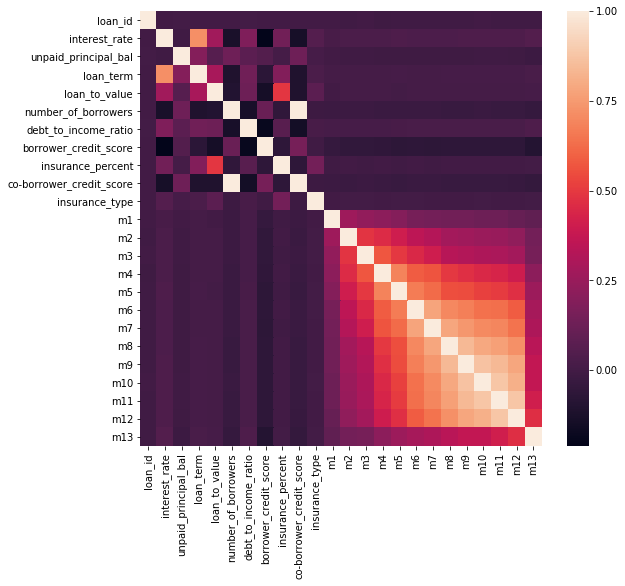

In [44]:
plt.subplots(figsize =(9, 8)) 
sns.heatmap(df.corr())

co-borrower_credit_score and number_of_borrowers are highly co-related. so we will take number_of_borrowers and  drop co-borrower_credit_score.

In [45]:
df['No of deliquent months max'] = df[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']].max(axis=1)

In [46]:
df['Credit Score-Max'] = df[['borrower_credit_score','co-borrower_credit_score']].max(axis=1)

In [47]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m6,m7,m8,m9,m10,m11,m12,m13,No of deliquent months max,Credit Score-Max
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,1,0,0,0,0,0,1,1,694.0
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,1,0,1,1,697.0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,1,0,780.0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,1,1,1,1,1,1,638.0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,5,6,7,8,9,10,11,1,11,681.0


In [48]:
df=df.drop(['loan_id','origination_date','first_payment_date','co-borrower_credit_score'],axis=1)

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df.select_dtypes(include=['object'])

In [50]:
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,source,financial_institution,loan_purpose
0,2,18,2
1,1,15,1
2,2,17,1
3,0,8,1
4,0,8,2


In [51]:
df=df.drop(['source','financial_institution','loan_purpose'],axis=1)
df.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,...,m6,m7,m8,m9,m10,m11,m12,m13,No of deliquent months max,Credit Score-Max
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0,...,0,1,0,0,0,0,0,1,1,694.0
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,1,697.0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,780.0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,0.0,0,...,0,0,0,1,1,1,1,1,1,638.0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0,...,5,6,7,8,9,10,11,1,11,681.0


In [52]:
df1=pd.concat([df,df_categorical],axis=1)
df1.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,...,m9,m10,m11,m12,m13,No of deliquent months max,Credit Score-Max,source,financial_institution,loan_purpose
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0,...,0,0,0,0,1,1,694.0,2,18,2
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0,...,0,0,1,0,1,1,697.0,1,15,1
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0,...,0,0,0,0,1,0,780.0,2,17,1
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,0.0,0,...,1,1,1,1,1,1,638.0,0,8,1
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0,...,8,9,10,11,1,11,681.0,0,8,2


In [53]:
X=df1.drop(['m13'],axis=1)
y=df1.m13

In [54]:
X.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,...,m8,m9,m10,m11,m12,No of deliquent months max,Credit Score-Max,source,financial_institution,loan_purpose
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0,...,0,0,0,0,0,1,694.0,2,18,2
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0,...,0,0,0,1,0,1,697.0,1,15,1
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0,...,0,0,0,0,0,0,780.0,2,17,1
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,0.0,0,...,0,1,1,1,1,1,638.0,0,8,1
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0,...,7,8,9,10,11,11,681.0,0,8,2


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
x_train.shape

(81240, 26)

In [58]:
y_test.shape

(34818,)

In [59]:
x_train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,...,m8,m9,m10,m11,m12,No of deliquent months max,Credit Score-Max,source,financial_institution,loan_purpose
65285,4.125,198000,360,78,1.0,34.0,752.0,0.0,0.0,0,...,0,0,0,0,0,0,752.0,1,1,1
53860,4.500,210000,360,85,1.0,21.0,783.0,12.0,1.0,0,...,0,0,0,0,0,0,783.0,1,5,1
103085,4.125,90000,360,70,1.0,19.0,778.0,0.0,0.0,0,...,0,0,0,0,0,0,778.0,1,1,2
2659,5.000,88000,360,79,1.0,29.0,684.0,0.0,0.0,0,...,0,0,0,0,0,0,684.0,1,1,0
30135,3.875,185000,360,73,1.0,39.0,763.0,0.0,0.0,0,...,0,0,0,0,0,1,763.0,2,9,2


## Recursive Feature Engineering

In [60]:
#no of features
nof_list=np.arange(1,26)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.996037


In [61]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 6)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['interest_rate', 'number_of_borrowers', 'insurance_type', 'm3', 'm12',
       'No of deliquent months max'],
      dtype='object')


In [62]:
#no of features
nof_list=np.arange(1,26)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = RandomForestClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 20
Score with 20 features: 0.996295


In [63]:
cols = list(X.columns)
model = RandomForestClassifier()
#Initializing RFE model
rfe = RFE(model, 15)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'debt_to_income_ratio', 'borrower_credit_score', 'm8', 'm9', 'm11',
       'm12', 'No of deliquent months max', 'Credit Score-Max', 'source',
       'financial_institution', 'loan_purpose'],
      dtype='object')


In [64]:
#no of features
nof_list=np.arange(1,26)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = DecisionTreeClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.995721


In [65]:
cols = list(X.columns)
model = DecisionTreeClassifier()
#Initializing RFE model
rfe = RFE(model, 1)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['m12'], dtype='object')


In [66]:
#no of features
nof_list=np.arange(1,26)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = AdaBoostClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.996094


In [67]:
cols = list(X.columns)
model = AdaBoostClassifier()
#Initializing RFE model
rfe = RFE(model, 8)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['interest_rate', 'unpaid_principal_bal', 'loan_to_value',
       'debt_to_income_ratio', 'borrower_credit_score',
       'No of deliquent months max', 'Credit Score-Max',
       'financial_institution'],
      dtype='object')


After running different models with RFE techniques (in various combinations): following features are explaining delinquency in m13 month mostly;
'interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'source',''No of deliquent months max' ,'m11', 'm12']

In [68]:
cols=['interest_rate', 'unpaid_principal_bal', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 
      'borrower_credit_score', 'source','No of deliquent months max' ,'m11', 'm12']

In [69]:
#train = df1.iloc[:116058,:]
#test = df1.iloc[116058:,:]
train = df1.iloc[:116058,:][cols]
test = df1.iloc[116058:,:][cols]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

In [71]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [72]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
lr.score(x_train,y_train)

0.9942885278188085

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9939399161353323

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34607,    14],
       [  197,     0]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34621
           1       0.00      0.00      0.00       197

    accuracy                           0.99     34818
   macro avg       0.50      0.50      0.50     34818
weighted avg       0.99      0.99      0.99     34818



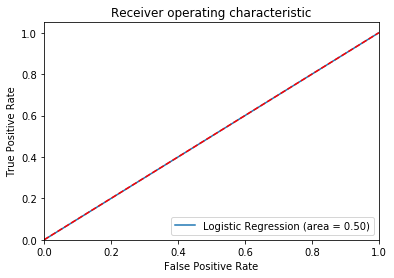

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [78]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [79]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
dt.score(x_train,y_train)

1.0

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9919581825492562

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34467,   154],
       [  126,    71]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34621
           1       0.32      0.36      0.34       197

    accuracy                           0.99     34818
   macro avg       0.66      0.68      0.67     34818
weighted avg       0.99      0.99      0.99     34818



In [84]:
print("f1_score:",f1_score(y_test, y_pred))

f1_score: 0.33649289099526064


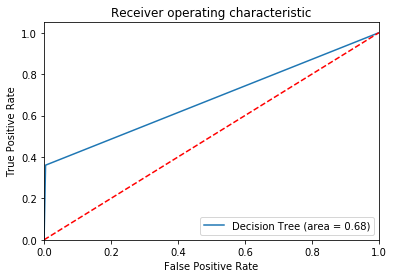

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [86]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [87]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score
rf.score(x_train,y_train)

0.9991875923190546

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9956057211787007

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34603,    18],
       [  135,    62]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34621
           1       0.78      0.31      0.45       197

    accuracy                           1.00     34818
   macro avg       0.89      0.66      0.72     34818
weighted avg       0.99      1.00      0.99     34818



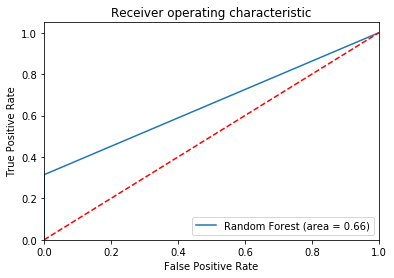

In [92]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [93]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [94]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
knn.score(x_train,y_train)

0.9946085672082717

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9943420070078695

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34621,     0],
       [  197,     0]], dtype=int64)

In [98]:
from sklearn.metrics import classification_report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34621
           1       0.00      0.00      0.00       197

    accuracy                           0.99     34818
   macro avg       0.50      0.50      0.50     34818
weighted avg       0.99      0.99      0.99     34818



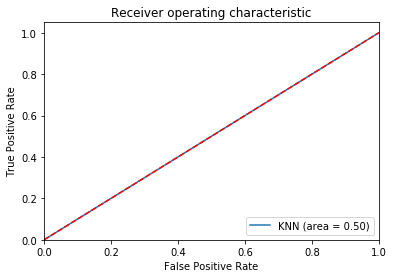

In [99]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [100]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [101]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
nb.score(x_train,y_train)

0.9942269817823732

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9939973576885519

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34604,    17],
       [  192,     5]], dtype=int64)

In [105]:
from sklearn.metrics import classification_report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34621
           1       0.23      0.03      0.05       197

    accuracy                           0.99     34818
   macro avg       0.61      0.51      0.52     34818
weighted avg       0.99      0.99      0.99     34818



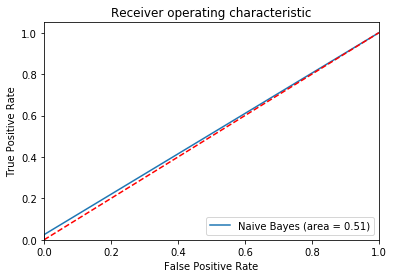

In [106]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [107]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [108]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
nb.score(x_train,y_train)

0.9942269817823732

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9955482796254811

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34599,    22],
       [  133,    64]], dtype=int64)

In [112]:
from sklearn.metrics import classification_report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34621
           1       0.74      0.32      0.45       197

    accuracy                           1.00     34818
   macro avg       0.87      0.66      0.73     34818
weighted avg       0.99      1.00      0.99     34818



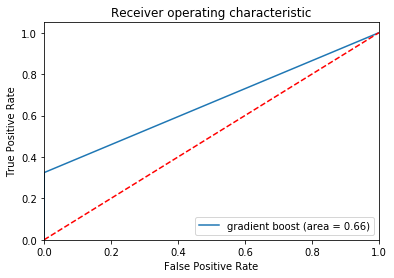

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='gradient boost (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [114]:
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)

In [115]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
nb.score(x_train,y_train)

0.9942269817823732

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9956631627319202

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[34597,    24],
       [  127,    70]], dtype=int64)

In [119]:
from sklearn.metrics import classification_report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34621
           1       0.74      0.36      0.48       197

    accuracy                           1.00     34818
   macro avg       0.87      0.68      0.74     34818
weighted avg       0.99      1.00      0.99     34818



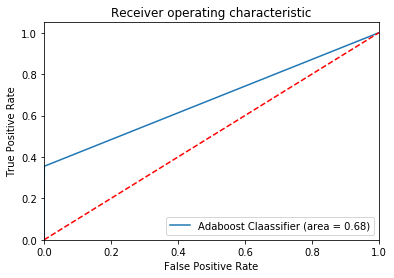

In [120]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Adaboost Claassifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [121]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_train, y_train = smote.fit_sample(x_train, y_train)
x_train.shape, y_train.shape

((161602, 10), (161602,))

In [122]:
x_test.shape

(34818, 10)

In [123]:
y_test.shape

(34818,)

In [125]:
model = AdaBoostClassifier()
model.fit(x_train, y_train) # training the model

ypred = model.predict(x_test)

print("f1_score:",f1_score(y_test, model.predict(x_test))) # calculating f1 score
print("Accuracy on train data:",model.score(x_train,y_train))
print("Accuracy on test data:",model.score(x_test,y_test))

f1_score: 0.41269841269841273
Accuracy on train data: 0.9773517654484474
Accuracy on test data: 0.9914986501234994


In [126]:
pd.crosstab(ypred,y_test)

m13,0,1
row_0,,
0,34418,93
1,203,104


In [127]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     34621
           1       0.34      0.53      0.41       197

    accuracy                           0.99     34818
   macro avg       0.67      0.76      0.70     34818
weighted avg       0.99      0.99      0.99     34818



In [129]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train) # training the model

ypred = model.predict(x_test)

print("f1_score:",f1_score(y_test, model.predict(x_test))) # calculating f1 score
print("Accuracy on train data:",model.score(x_train,y_train))
print("Accuracy on test data:",model.score(x_test,y_test))

f1_score: 0.410958904109589
Accuracy on train data: 0.9810645907847675
Accuracy on test data: 0.9913550462404503


In [130]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     34621
           1       0.33      0.53      0.41       197

    accuracy                           0.99     34818
   macro avg       0.67      0.76      0.70     34818
weighted avg       0.99      0.99      0.99     34818



In [131]:
model = RandomForestClassifier()
model.fit(x_train, y_train) # training the model

ypred = model.predict(x_test)

print("f1_score:",f1_score(y_test, model.predict(x_test))) # calculating f1 score
print("Accuracy on train data:",model.score(x_train,y_train))
print("Accuracy on test data:",model.score(x_test,y_test))

f1_score: 0.47318611987381703
Accuracy on train data: 0.9996658457197312
Accuracy on test data: 0.9952036303061634


In [132]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34621
           1       0.62      0.38      0.47       197

    accuracy                           1.00     34818
   macro avg       0.81      0.69      0.74     34818
weighted avg       0.99      1.00      0.99     34818



In [133]:
model = RandomForestClassifier(criterion ='entropy', max_depth = 10, max_features ='auto',
                            n_estimators = 100, class_weight='balanced', n_jobs=-1, random_state=42 )

model.fit(x_train, y_train) # training the model

ypred = model.predict(x_test)

print("f1_score:",f1_score(y_test, model.predict(x_test))) # calculating f1 score
print("Accuracy on train data:",model.score(x_train,y_train))
print("Accuracy on test data:",model.score(x_test,y_test))

f1_score: 0.47282608695652173
Accuracy on train data: 0.9803529659286395
Accuracy on test data: 0.9944281693376988


In [134]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34621
           1       0.51      0.44      0.47       197

    accuracy                           0.99     34818
   macro avg       0.75      0.72      0.74     34818
weighted avg       0.99      0.99      0.99     34818

